In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import concatenate, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Flatten, LeakyReLU, MaxPooling2D, Reshape, UpSampling2D
from keras.optimizers import Adam, RMSprop

In [27]:
input_shape=(512,512,3)
epochs = 5
batch_size=36
optimizer = Adam(0.0002, 0.5)
# optimizer = RMSprop(lr=0.0001, decay=3e-8)

In [7]:
samples = []
gts = []
test_samples = []
test_gts = []

for i in range(1,361):
    sample = cv2.imread('Dataset_Part1/Dataset_Part1/' + str(i) + '/1.jpg')
    sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
    sample = cv2.resize(sample, (512, 512))
    gt = cv2.imread('Dataset_Part1/Dataset_Part1/Label/' + str(i) + '.jpg')
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
    gt = cv2.resize(gt, (512, 512))

    samples.append(sample)
    gts.append(gt)

for j in range(1,231):
    test_sample = cv2.imread('Dataset_Part2/Dataset_Part2/' + str(i) + '/1.jpg')
    test_sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
    test_sample = cv2.resize(sample, (512, 512))
    test_gt = cv2.imread('Dataset_Part2/Dataset_Part2/Label/' + str(i) + '.jpg')
    test_gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
    test_gt = cv2.resize(gt, (512, 512))

    test_samples.append(test_sample)
    test_gts.append(test_gt)


(512, 512, 3)


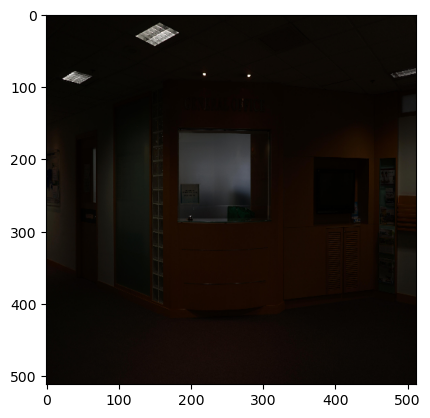

In [8]:
print(samples[14].shape)
plt.imshow(samples[14])

(512, 512, 3)


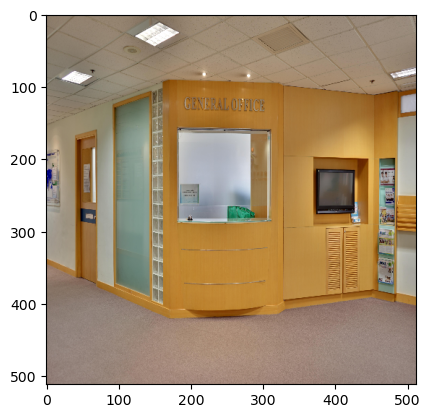

In [9]:
print(gts[14].shape)
plt.imshow(gts[14])

In [10]:
samples = np.array(samples)
gts = np.array(gts)
test_samples = np.array(test_samples)
test_gts = np.array(test_gts)

print(samples.shape)
print(gts.shape)

(360, 512, 512, 3)
(360, 512, 512, 3)


In [11]:
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

In [12]:
#generator
def Generator():
    inputs = Input(shape=input_shape)
    # inputs = Reshape(input_shape)(inputs)
    conv1 = Conv2D(64, kernel_size=3, strides=2, padding='same')(inputs)
    conv1 = BatchNormalization(momentum=0.8)(conv1)
    conv1 = LeakyReLU(alpha=0.2)(conv1)
    # print('conv1', conv1.shape)

    conv2 = Conv2D(128, kernel_size=3, strides=2, padding='same')(conv1)
    conv2 = BatchNormalization(momentum=0.8)(conv2)
    conv2 = LeakyReLU(alpha=0.2)(conv2)
    # print('conv2', conv2.shape)

    conv3 = Conv2D(256, kernel_size=3, strides=2, padding='same')(conv2)
    conv3 = BatchNormalization(momentum=0.8)(conv3)
    conv3 = LeakyReLU(alpha=0.2)(conv3)
    # print('conv3', conv3.shape)

    conv4 = Conv2D(512, kernel_size=3, strides=2, padding='same')(conv3)
    conv4 = BatchNormalization(momentum=0.8)(conv4)
    conv4 = LeakyReLU(alpha=0.2)(conv4)
    # print('conv4', conv4.shape)

    conv5 = Conv2D(1024, kernel_size=3, strides=2, padding='same')(conv4)
    conv5 = BatchNormalization(momentum=0.8)(conv5)
    conv5 = LeakyReLU(alpha=0.2)(conv5)
    # print('conv5', conv5.shape)

    # up6 = Conv2D(512, kernel_size=3, strides=2)(UpSampling2D(size=(2,2))(conv5))
    up6 = Conv2DTranspose(512, kernel_size=3, strides=2, padding='same')(conv5)
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = Conv2D(512, kernel_size=3, strides=2, padding='same')(merge6)
    conv6 = BatchNormalization(momentum=0.8)(conv6)
    conv6 = LeakyReLU(alpha=0.2)(conv6)
    # print('conv6', conv6.shape)

    # up7 = Conv2D(256, kernel_size=3, strides=2, padding='same')(UpSampling2D(size=(2,2))(conv6))
    up7 = Conv2DTranspose(256, kernel_size=3, strides=2, padding='same')(UpSampling2D(size=(2,2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, kernel_size=3, strides=2, padding='same')(merge7)
    conv7 = BatchNormalization(momentum=0.8)(conv7)
    conv7 = LeakyReLU(alpha=0.2)(conv7)
    # print('conv7', conv7.shape)

    # up8 = Conv2D(128, kernel_size=3, strides=2)(UpSampling2D(size=(2,2))(conv7))
    up8 = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same')(UpSampling2D(size=(2,2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, kernel_size=3, strides=2, padding='same')(merge8)
    conv8 = BatchNormalization(momentum=0.8)(conv8)
    conv8 = LeakyReLU(alpha=0.2)(conv8)
    # print('conv8', conv8.shape)

    # up9 = Conv2D(64, kernel_size=3, strides=2)(UpSampling2D(size=(2,2))(conv8))
    up9 = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, kernel_size=3, strides=2, padding='same')(merge9)
    conv9 = BatchNormalization(momentum=0.8)(conv9)
    conv9 = LeakyReLU(alpha=0.2)(conv9)
    # print('conv9', conv9.shape)

    conv10 = Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same')(UpSampling2D(size=(2,2))(conv9))
    # print('conv10', conv10.shape)

    generator = Model(inputs=[inputs], outputs=[conv10])

    # generator.summary()

    return generator

In [13]:
#discriminator
def Discriminator():
    discriminator = Sequential(
        [
            Conv2D(64, kernel_size=5, strides=2, input_shape=input_shape),
            BatchNormalization(momentum=0.8),
            LeakyReLU(alpha=0.2),
            Conv2D(128, kernel_size=5, strides=2),
            BatchNormalization(momentum=0.8),
            LeakyReLU(alpha=0.2),
            Conv2D(128, kernel_size=3, strides=2),
            BatchNormalization(momentum=0.8),
            LeakyReLU(alpha=0.2),
            Conv2D(256, kernel_size=3, strides=2),
            BatchNormalization(momentum=0.8),
            LeakyReLU(alpha=0.2),
            Conv2D(1, kernel_size=3, strides=1),
            Flatten(),
            Dense(1024, activation='relu'),
            Dense(1, activation='sigmoid')
        ]
    )

    # discriminator.summary()

    # discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return discriminator

In [14]:
#adversarial model
def AM():
    am = Sequential()

    generator = Generator()
    discriminator = Discriminator()
    discriminator.trainable = False

    am.add(generator)
    am.add(discriminator)

    am.summary()
    
    am.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer, metrics=['accuracy'])

    return am

In [15]:
gen = Generator()
disc = Discriminator()
adv = AM()

disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 512, 512, 3)       18819779  
                                                                 
 sequential_2 (Sequential)   (None, 1)                 1462018   
                                                                 
Total params: 20,281,797
Trainable params: 18,813,891
Non-trainable params: 1,467,906
_________________________________________________________________


In [28]:
for epoch in range(epochs):
    idx = np.random.randint(0, samples.shape[0], batch_size)
    
    ldr = samples[idx]
    hdr = gts[idx]

    gen_imgs = adv.layers[0].predict(ldr)

    d_loss_real = disc.train_on_batch(hdr, valid)
    d_loss_fake = disc.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    y = np.ones([batch_size, 1])
    a_loss = adv.train_on_batch(ldr, y)

    log_mesg = "%d: [D loss: %f, acc: %f]" % (epoch+1, d_loss[0], d_loss[1])
    log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
    print(log_mesg)

2/2 [==============================] - 4s 436ms/step


In [25]:
idx = np.random.randint(0, test_samples.shape[0], batch_size)
ldr = test_samples[idx]
hdr = test_gts[idx]
gen_imgs = adv.layers[0].predict(ldr)

2/2 [==============================] - 5s 537ms/step


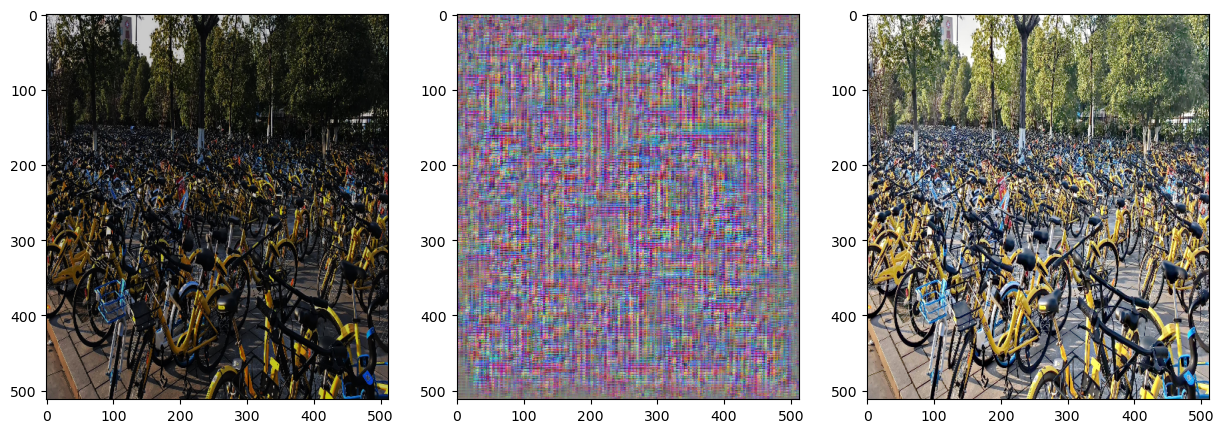

In [26]:
f, ax= plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(ldr[0], aspect='auto')
ax[1].imshow(gen_imgs[0], aspect='auto')
ax[2].imshow(hdr[0], aspect='auto')
plt.show()